# HTC Case study assignment.

### Problem Statement:
**Given diabetes related dataset and the objective is to determine the following with help of AI/ML**
- Identify patients on path to high-cost disease state.
- Assign patient scores based on the severity of condition.
- Seggregate patients for 2 possible care paths.
    - Care Intervention.
    - Lower cost of care.
    
#### Use the python and any of the relevant AI/ML libraries to implement and achieve any of the 3 objectives or all 3 objectives
- Cleanse the data removing blank rows.
- Handle the outliers and missing data.
- Implement EDA and determine quality of data and is the data sufficient to achieve any of the above objective.
- Implement properly the categorical data with proper encoding.
- Implement proper feature engineering.
- Use the proper ML algorithm for training the model and data predictions. Leverage supervised or unsupervised algorithms based on the given dataset.

### The input dataset is uploaded in below link
https://usecasedata1.blob.core.windows.net/diabetesdc/diabetes_data.xlsx

### Expected output:
- Categorize patient data based on diabetes severity level(high, medium, low)


# Solution:

### Importing necessary libraries and packages:

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Loading the df:

In [83]:
df =  pd.read_excel("diabetes_data.xlsx", sheet_name = "Sheet1")

In [84]:
df.shape

(101766, 51)

In [85]:
df

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101762,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,101763,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,101764,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,101765,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [86]:
df.columns

Index(['id', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide.metformin', 'glipizide.metformin',
       'glimepiride.pioglitazone', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## Data Preprosessing/Cleaning :

### Handelling null values:

In [87]:
df.isnull().sum()

id                              0
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

In [88]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'id':
[     1      2      3 ... 101764 101765 101766]


Unique values in column 'encounter_id':
[  2278392    149190     64410 ... 443854148 443857166 443867222]


Unique values in column 'patient_nbr':
[  8222157  55629189  86047875 ... 140199494 120975314 175429310]


Unique values in column 'race':
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


Unique values in column 'gender':
['Female' 'Male' 'Unknown/Invalid']


Unique values in column 'age':
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


Unique values in column 'weight':
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


Unique values in column 'admission_type_id':
[6 1 2 3 4 5 8 7]


Unique values in column 'discharge_disposition_id':
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]


Unique values in column 'admission_source_id':
[ 1  7  2  4  5

## Why replacing the "? " With np.nan ? 
### As in this df the null values are represend using "?" .

- df.isnull().sum() is giving output which seems incorrect as we can see "?" in the weight column.
- After going through the whole dataset the observation is that the null/nan values are represented by "?" in this df. 
- Now we will handle it according.

In [89]:
df = df.replace(to_replace = "?", value = np.nan) 
df['gender'] = df['gender'].replace('Unknown/Invalid', np.nan)


In [90]:
df.isnull().sum()

id                              0
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

### Now we have got the columns where we need to do imputation lets see if there are any rows which are colpletly empty or having very less data points.




In [91]:
# Calculateing the number of null values in each row.
null_counts_per_row = df.isnull().sum(axis=1)

# Getting the maximum number of null values in any row.
max_null_count = null_counts_per_row.max()
print("Maximum no of null values in a row:", max_null_count)

# Checking which rows have the maximum number of null values.
rows_with_max_null = df[null_counts_per_row == max_null_count]
print("Total no of rows which are having maximum no if null values:", len(rows_with_max_null))

# Now, 'rows_with_max_null' contains the rows with the maximum number of null values

Maximum no of null values in a row: 7
Total no of rows which are having maximum no if null values: 23


In [92]:
print("Total no of rows",df.shape[1])

Total no of rows 51


#### As the the maximum no of null values any row having is only 7 which is very less when compared to total no of columns i.e. 51, So lets not drop the rows as it  may be the cases of paicents which may need maximum care intervention, And here the use case is medical and ignoreace can lead to death as well, It's not the preffered thing to do even if it may impact our final model.


In [93]:
rows_with_max_null

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
66,67,715086,3376278,Caucasian,Male,[10-20),NaN,1,5,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2163,2164,14056032,58242528,Caucasian,Female,[10-20),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2794,2795,17844570,67749030,Caucasian,Male,[10-20),NaN,1,5,7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
3927,3928,23184132,85821228,NaN,Male,[60-70),NaN,3,1,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
6538,6539,32253420,112354299,Caucasian,Male,[10-20),NaN,6,1,17,...,No,Steady,No,No,No,No,No,No,Yes,NO
7160,7161,34400322,1266678,Caucasian,Male,[0-10),NaN,2,1,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
9351,9352,40869666,7804071,AfricanAmerican,Female,[40-50),NaN,3,18,1,...,No,Steady,No,No,No,No,No,No,Yes,NO
11893,11894,48795570,19692765,Caucasian,Female,[40-50),NaN,1,18,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
14355,14356,56000970,20296278,Caucasian,Male,[0-10),NaN,1,5,7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
14851,14852,57492246,4559220,Caucasian,Female,[30-40),NaN,1,18,7,...,No,Steady,No,No,No,No,No,No,Yes,NO


In [94]:
df.describe()

,id,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,50883.500000,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,29377.458084,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,25442.250000,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,50883.500000,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,76324.750000,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,101766.000000,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [95]:
df.shape

(101766, 51)

In [96]:
df.nunique()


id                          101766
encounter_id                101766
patient_nbr                  71518
race                             5
gender                           2
age                             10
weight                           9
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      17
medical_specialty               72
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
diag_2                         748
diag_3                         789
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide      

#### After carefully going through the df we have decided to drop some columns they are hving relevent information for our analysis and as we are doing machine learning tasks, keeping them can introduce unnecessary noise into your models.

#### As our objective also includes  Identifing patients on path to high-cost disease state, we can do that using patient_nbr assuming that patient_nbr is the unique id given to each patient, As we don't have suffient data with respect to each column.

###### Here we are droping constant columns as there is no meaningful information or variability in the data added by these columns. 


In [97]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_columns, inplace=True)

### Deleting the above two columns as they are having only one unique value and will make no impact on the prediction.

In [98]:
# df = df.drop(columns=["encounter_id","id"])


In [99]:
df = df.drop(columns=["encounter_id","id","patient_nbr","admission_type_id", "discharge_disposition_id", "admission_source_id","payer_code"])


In [100]:
df.shape

(101766, 42)

In [101]:
print(df["readmitted"].unique())


['NO' '>30' '<30']


### In the Target variable we have 3 unique values which we can interpret as:
- "NO": Means this pacient is never being readmitted which can also be said as he/she does'nt need any further medical assistance hence can be put into least diabetes severity.
- "<30": which means has been readmitted less then 30 time hence having medium level of diabetes severity.
- ">30": which means has been readmitted more then 30 time hence having High level of diabetes severity.

#### So, we will label encode them with 1, 2 and 3 as it have a symentic meaning.


In [102]:
label_mapping = {"NO": 0, "<30": 1, ">30": 2}

df['readmitted'] = df['readmitted'].map(label_mapping)

In [103]:
df.shape

(101766, 42)

### Now we will handel the null values accoding to the nature of the columns.
- We will do mode filling if the columns are cadinal.
- WE will do the mean filling if the columns are ordinal and having numbers which is measurable.
- Id is also ordinal variable but it not a quantitive one so WE will not fill them mean all though there are no missing values in those columns.
- As the age and weight are a odinal variable but here they are represented in range we will mode fill them and then do label encodeing for them.
- For 'diag_1', 'diag_2', 'diag_3' It seems like some measure of some medical diagnosis, We have no clue about what it is, also reserched a bit and find the blood suger/glucose levels ranges between 70 to 200 but in these columns the measure is ranging from any where between ~30 to ~1000 so have no clue what should we do, So we just droped the one with values like E877 or V60 which were ~2000 rows which were ~2% of the total data, as it was less. and then filled nan with mean.
- For 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult' there were 40% to 90% of data was missing and it seemed it is also a feature which is important to be captured to labelled it as not_available.

In [104]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'race':
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']


Unique values in column 'gender':
['Female' 'Male' nan]


Unique values in column 'age':
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


Unique values in column 'weight':
[nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


Unique values in column 'time_in_hospital':
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


Unique values in column 'medical_specialty':
['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-

In [105]:
df.isnull().sum()

race                         2273
gender                          3
age                             0
weight                      98569
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose      

In [106]:
print(df["race"].unique())

['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']


In [107]:
df.race.isnull().sum()

2273

In [108]:
column_mode = df['race'].mode().values[0]

# Filling missing values in the column with the mode
df['race'].fillna(column_mode, inplace=True)

In [109]:
df

,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,1,Pediatrics-Endocrinology,41,0,1,0,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),NaN,3,NaN,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,2
2,AfricanAmerican,Female,[20-30),NaN,2,NaN,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),NaN,2,NaN,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),NaN,1,NaN,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,3,NaN,51,0,16,0,...,No,Down,No,No,No,No,No,Ch,Yes,2
101762,AfricanAmerican,Female,[80-90),NaN,5,NaN,33,3,18,0,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,Caucasian,Male,[70-80),NaN,1,NaN,53,0,9,1,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,Caucasian,Female,[80-90),NaN,10,Surgery-General,45,2,21,0,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [110]:
print(df["gender"].unique())


['Female' 'Male' nan]


In [111]:
df.gender.isnull().sum()

3

In [112]:
column_mode = df['gender'].mode().values[0]

# Filling missing values in the column with the mode
df['gender'].fillna(column_mode, inplace=True)
# One-hot encoding also droping first to avoid dummy variable trap.


In [113]:
df.age.isnull().sum()

0

In [114]:
print(df["age"].unique())


['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


In [115]:
df.rename(columns={'age': 'age_group'}, inplace=True)

label_mapping = {'[0-10)':1, '[10-20)':2, '[20-30)':3, '[30-40)':4, '[40-50)':5, '[50-60)':6, '[60-70)':7, '[70-80)':8, '[80-90)':9, '[90-100)':10}

df['age_group'] = df['age_group'].map(label_mapping)


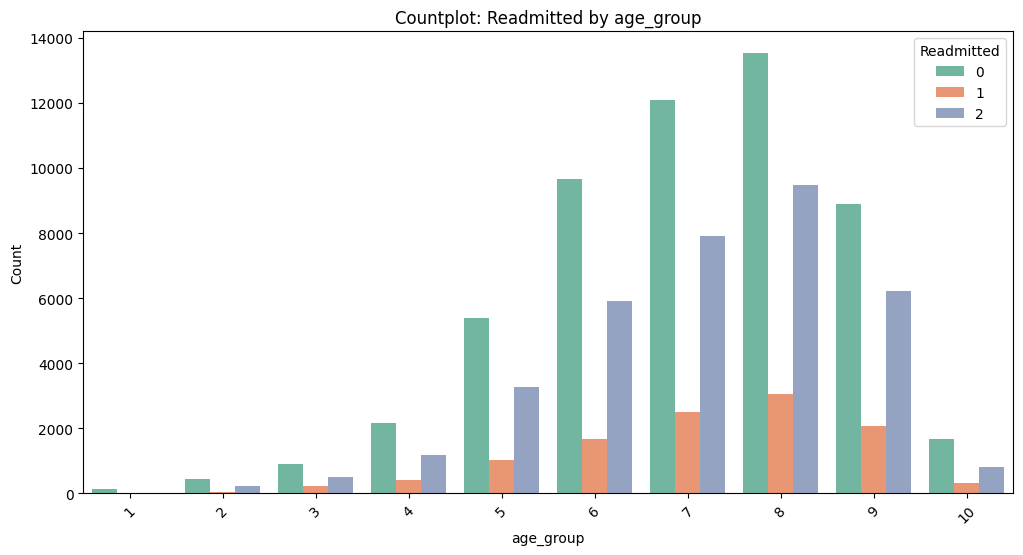

In [116]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_group', hue='readmitted', palette='Set2')
plt.xlabel('age_group')
plt.ylabel('Count')
plt.title('Countplot: Readmitted by age_group')
plt.legend(title='Readmitted', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [117]:
df

,race,gender,age_group,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,1,NaN,1,Pediatrics-Endocrinology,41,0,1,0,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,2,NaN,3,NaN,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,2
2,AfricanAmerican,Female,3,NaN,2,NaN,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,4,NaN,2,NaN,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,5,NaN,1,NaN,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,8,NaN,3,NaN,51,0,16,0,...,No,Down,No,No,No,No,No,Ch,Yes,2
101762,AfricanAmerican,Female,9,NaN,5,NaN,33,3,18,0,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,Caucasian,Male,8,NaN,1,NaN,53,0,9,1,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,Caucasian,Female,9,NaN,10,Surgery-General,45,2,21,0,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [118]:
df.weight.isnull().sum()

98569

In [119]:
df.weight.unique()


array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [120]:
df.rename(columns={'weight': 'weight_group'}, inplace=True)

label_mapping = { np.nan:np.nan, '[0-25)':1, '[25-50)':2, '[50-75)':3, '[75-100)':4, '[100-125)':5, '[125-150)':6, '[150-175)':7, '[175-200)':8, '>200':9}

df['weight_group'] = df['weight_group'].map(label_mapping)

In [121]:
df.weight_group.unique()


array([nan,  4.,  3.,  1.,  5.,  2.,  6.,  8.,  7.,  9.])

In [122]:
column_mean = round(df['weight_group'].mean())

# Filling missing values in the column with the mode
df['weight_group'].fillna(column_mean, inplace=True)

In [123]:
df.weight_group.unique()


array([4., 3., 1., 5., 2., 6., 8., 7., 9.])

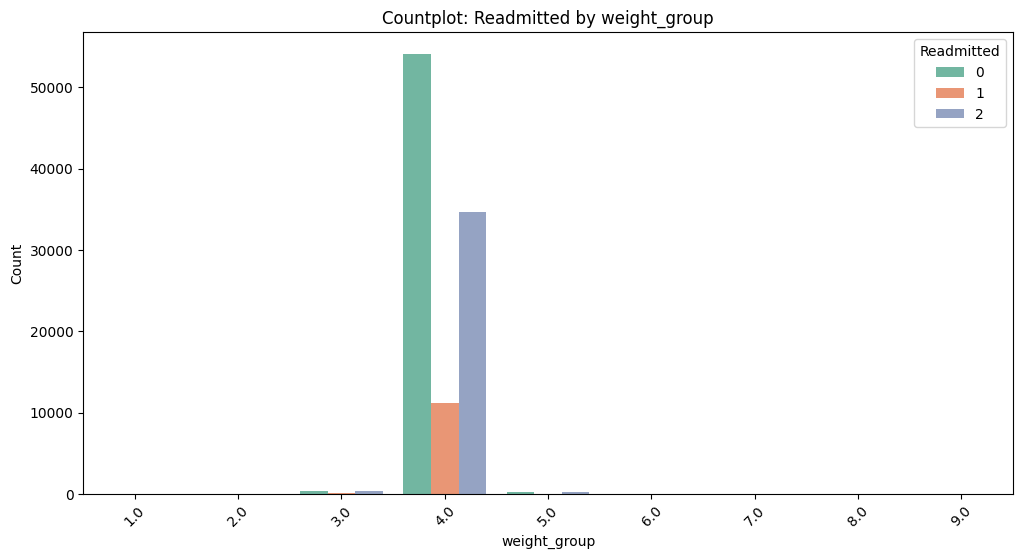

In [124]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='weight_group', hue='readmitted', palette='Set2')
plt.xlabel('weight_group')
plt.ylabel('Count')
plt.title('Countplot: Readmitted by weight_group')
plt.legend(title='Readmitted', loc='upper right')
plt.xticks(rotation=45)
plt.show()

#### The above plot makes sense as the weight catagory 4 represents is 75-100 and as per the data this is the range of weight in which obese and over weighted population is also found.

#### Data also states the accumulation of an excessive amount of body fat can cause type 2 diabetes, and the risk of type 2 diabetes increases linearly with an increase in body mass index, which is directly related with Weight.

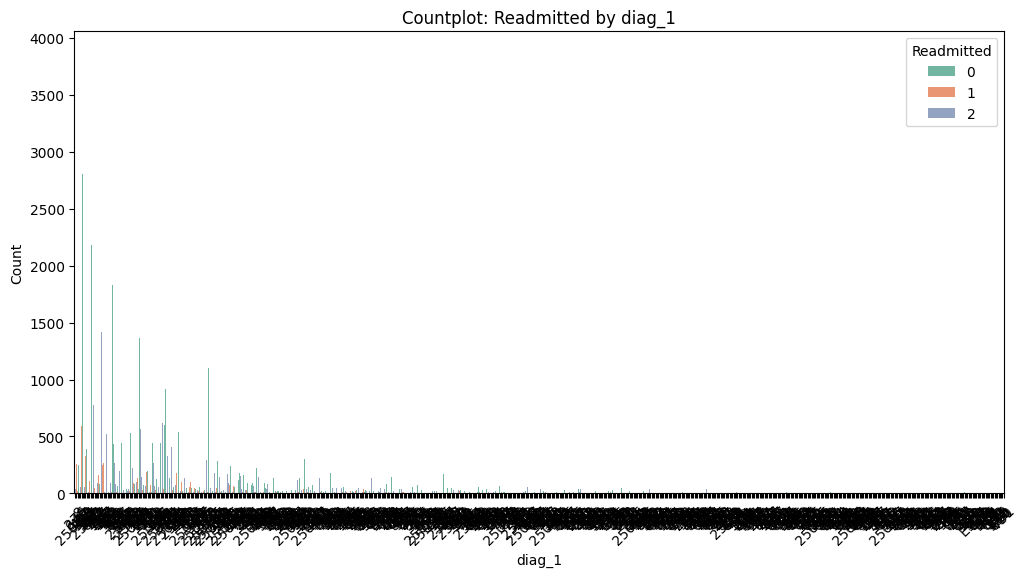

In [125]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='diag_1', hue='readmitted', palette='Set2')
plt.xlabel('diag_1')
plt.ylabel('Count')
plt.title('Countplot: Readmitted by diag_1')
plt.legend(title='Readmitted', loc='upper right')
plt.xticks(rotation=45)
plt.show()

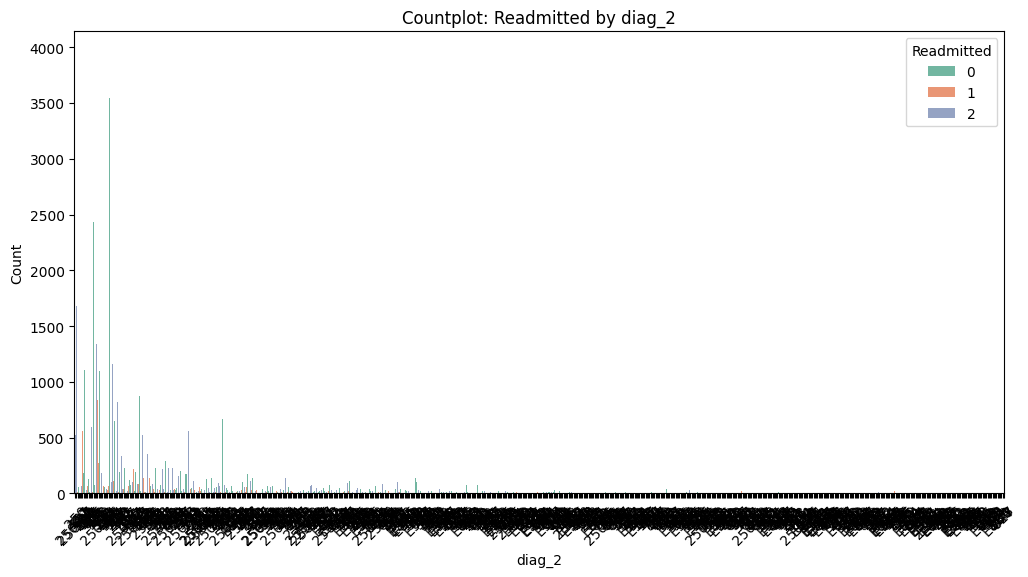

In [126]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='diag_2', hue='readmitted', palette='Set2')
plt.xlabel('diag_2')
plt.ylabel('Count')
plt.title('Countplot: Readmitted by diag_2')
plt.legend(title='Readmitted', loc='upper right')
plt.xticks(rotation=45)
plt.show()

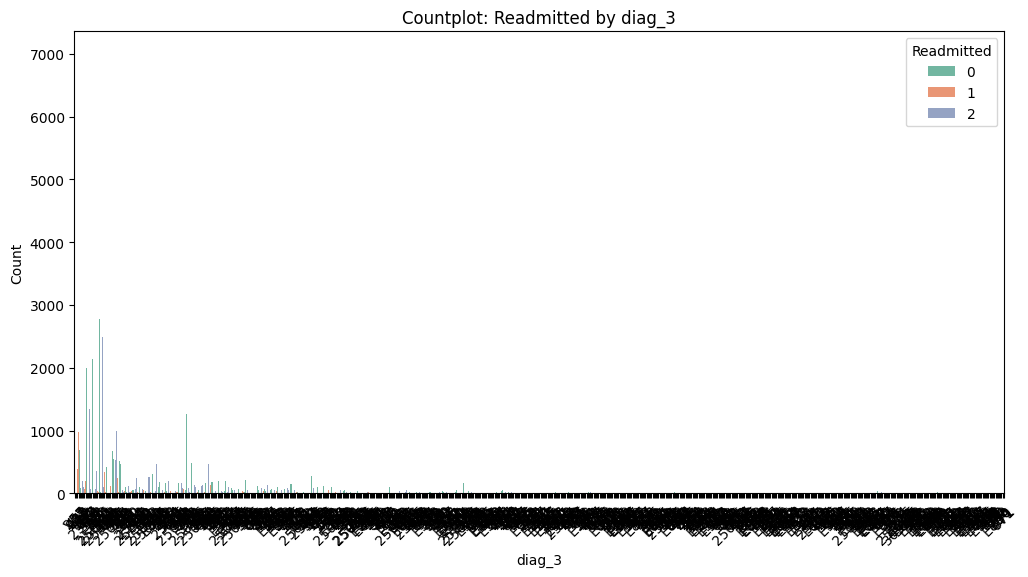

In [127]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='diag_3', hue='readmitted', palette='Set2')
plt.xlabel('diag_3')
plt.ylabel('Count')
plt.title('Countplot: Readmitted by diag_3')
plt.legend(title='Readmitted', loc='upper right')
plt.xticks(rotation=45)
plt.show()

#### Looking at countplot of the diag_1, diag_2, diag_3 it seems if we will do the mean imputation the information in the it may get impacted due to outliers so we will do mode impution.
#### Also the amount of missing value is ~<1.5% so it will not distort the overall context.

In [128]:
columns_to_fillna = ['diag_1', 'diag_2', 'diag_3']
for column in columns_to_fillna:
    df = df[pd.to_numeric(df[column], errors='coerce').notnull()]
    mean_value = df[column].mean()  # Calculate the mean.
    df[column].fillna(mean_value, inplace=True)

/tmp/ipykernel_6298/76681208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(mean_value, inplace=True)


In [129]:
df.isnull().sum()

race                            0
gender                          0
age_group                       0
weight_group                    0
time_in_hospital                0
medical_specialty           45331
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               86983
A1Cresult                   76207
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose      

In [138]:
columns_to_be_filled = ['medical_specialty', 'max_glu_serum', 'A1Cresult']
for col in columns_to_be_filled:
    df[col].fillna("not_available", inplace=True)


In [139]:
df.nunique()

race                          5
gender                        2
age_group                    10
weight_group                  9
time_in_hospital             14
medical_specialty            72
num_lab_procedures          118
num_procedures                7
num_medications              75
number_outpatient            39
number_emergency             33
number_inpatient             20
diag_1                      687
diag_2                      629
diag_3                      663
number_diagnoses             14
max_glu_serum                 4
A1Cresult                     4
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglitazone                  4
rosiglitazone                 4
acarbose                      4
miglitol                      4
troglita

In [140]:
df.columns

Index(['race', 'gender', 'age_group', 'weight_group', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide.metformin', 'glipizide.metformin',
       'glimepiride.pioglitazone', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

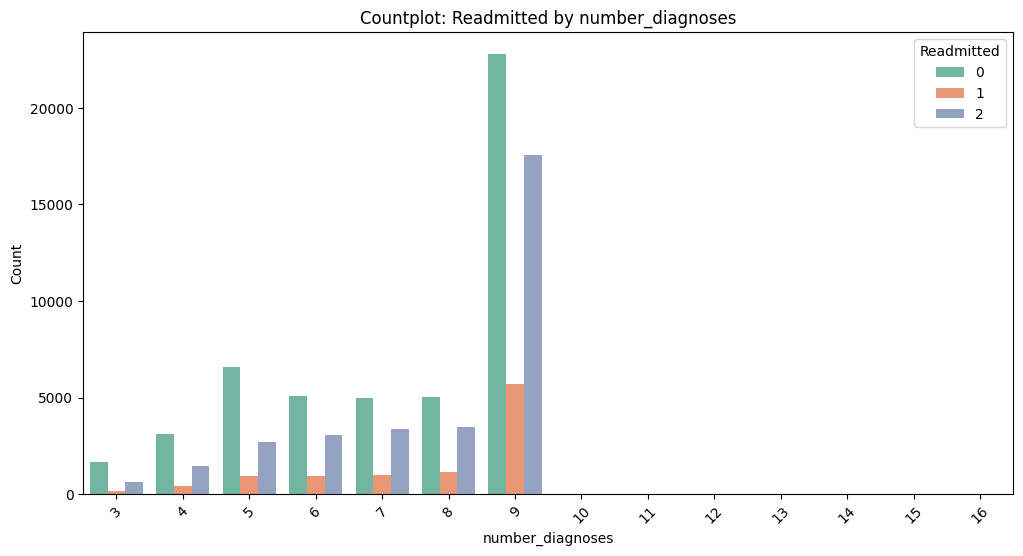

In [141]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='number_diagnoses', hue='readmitted', palette='Set2')
plt.xlabel('number_diagnoses')
plt.ylabel('Count')
plt.title('Countplot: Readmitted by number_diagnoses')
plt.legend(title='Readmitted', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [142]:
# target_variable = 'readmitted'

# # Separating numerical and categorical columns
# numerical_columns = df.select_dtypes(include=['number']).columns
# categorical_columns = df.select_dtypes(include=['object']).columns

# # Plot numerical columns against the target variable
# for num_col in numerical_columns:
#     if num_col != target_variable:
#         plt.figure(figsize=(8, 6))
#         sns.boxplot(x=target_variable, y=num_col, data=df)
#         plt.title(f'{num_col} vs. {target_variable}')
#         plt.show()

# # Plot categorical columns against the target variable
# for cat_col in categorical_columns:
#     if cat_col != target_variable:
#         plt.figure(figsize=(8, 6))
#         sns.countplot(x=cat_col, hue=target_variable, data=df)
#         plt.title(f'{cat_col} vs. {target_variable}')
#         plt.xticks(rotation=45)
#         plt.show()

In [147]:
columns_to_encode = ['race', 'gender', 'number_diagnoses','max_glu_serum', 'A1Cresult', 'metformin', 
                     'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide',
                     'glipizide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 
                     'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin','glyburide.metformin',
                     'glipizide.metformin','glimepiride.pioglitazone', 'metformin.rosiglitazone',
                     'metformin.pioglitazone', 'change', 'diabetesMed',"medical_specialty"]    

In [148]:
# Applying one-hot encoding on the remaining columns.
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [149]:
df

,age_group,weight_group,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-PlasticwithinHeadandNeck,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,medical_specialty_not_available
1,2,4.0,3,59,0,18,0,0,0,276,...,False,False,False,False,False,False,False,False,False,True
3,4,4.0,2,44,1,16,0,0,0,8,...,False,False,False,False,False,False,False,False,False,True
4,5,4.0,1,51,0,8,0,0,0,197,...,False,False,False,False,False,False,False,False,False,True
5,6,4.0,3,31,6,16,0,0,0,414,...,False,False,False,False,False,False,False,False,False,True
7,8,4.0,5,73,0,12,0,0,0,428,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,8,4.0,3,51,0,16,0,0,0,250.13,...,False,False,False,False,False,False,False,False,False,True
101762,9,4.0,5,33,3,18,0,0,1,560,...,False,False,False,False,False,False,False,False,False,True
101763,8,4.0,1,53,0,9,1,0,0,38,...,False,False,False,False,False,False,False,False,False,True
101764,9,4.0,10,45,2,21,0,0,1,996,...,False,False,False,False,False,False,False,False,False,False


In [150]:
# Calculate the correlation matrix
correlation_matrix= df.corr()

In [151]:
correlation_matrix

,age_group,weight_group,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-PlasticwithinHeadandNeck,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,medical_specialty_not_available
age_group,1.000000,-0.031122,0.092230,0.018247,-0.049892,0.017867,0.022552,-0.088402,-0.042465,0.005849,...,0.002637,-0.016716,-0.028533,-0.011253,-0.004557,0.003427,0.001415,-0.026959,-0.000320,0.044626
weight_group,-0.031122,1.000000,-0.007941,-0.014666,0.009167,0.007444,0.006159,-0.000507,-0.007555,0.012336,...,0.000052,0.000350,0.000043,0.000102,0.000017,0.000177,0.000383,0.000090,0.000429,-0.001663
time_in_hospital,0.092230,-0.007941,1.000000,0.333036,0.200125,0.477275,-0.008289,-0.007812,0.068214,-0.095591,...,0.003023,-0.016243,0.003829,0.005432,-0.003808,0.007020,-0.003511,0.003740,-0.024888,0.000092
num_lab_procedures,0.018247,-0.014666,0.333036,1.000000,0.060827,0.270775,-0.007806,-0.003856,0.042766,-0.082489,...,-0.005406,-0.032095,-0.000612,-0.011031,-0.002620,0.001915,-0.037041,-0.013293,-0.051183,0.006782
num_procedures,-0.049892,0.009167,0.200125,0.060827,1.000000,0.386691,-0.028449,-0.038357,-0.070138,-0.015239,...,-0.000194,0.022527,0.002955,0.010961,0.003113,0.042138,0.052242,-0.005106,0.024476,-0.059072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
medical_specialty_Surgery-Thoracic,0.003427,0.000177,0.007020,0.001915,0.042138,0.038303,-0.000605,-0.005039,-0.004380,-0.013117,...,-0.000332,-0.002222,-0.000271,-0.000645,-0.000111,1.000000,-0.002431,-0.000575,-0.002722,-0.033079
medical_specialty_Surgery-Vascular,0.001415,0.000383,-0.003511,-0.037041,0.052242,0.044846,0.010760,-0.006275,0.005946,0.008800,...,-0.000718,-0.004811,-0.000586,-0.001396,-0.000239,-0.002431,1.000000,-0.001244,-0.005894,-0.071630
medical_specialty_SurgicalSpecialty,-0.026959,0.000090,0.003740,-0.013293,-0.005106,-0.012272,0.010342,-0.001617,-0.002538,-0.002278,...,-0.000170,-0.001137,-0.000139,-0.000330,-0.000057,-0.000575,-0.001244,1.000000,-0.001393,-0.016929
medical_specialty_Urology,-0.000320,0.000429,-0.024888,-0.051183,0.024476,-0.010099,-0.011059,-0.006214,-0.012404,-0.003103,...,-0.000804,-0.005386,-0.000657,-0.001563,-0.000268,-0.002722,-0.005894,-0.001393,1.000000,-0.080188


In [ ]:
# Createing a heatmap plot:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()

In [ ]:
df.shape

In [ ]:
X = df.drop('readmitted', axis=1)  # Features
y = df['readmitted']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardizing the features.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Trying Ramdom Forest Classifier:

In [ ]:
# Training a classification model (Random Forest in this example, but you can use other classifiers)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

In [ ]:
# Makeing predictions on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluateing the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

In [ ]:
# Createing a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Ploting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Trying XGBoost Classifier:

In [ ]:
# Training a classification model (XGBoost in this example, but you can use other classifiers)
classifier = xgb.XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)
classifier.fit(X_train, y_train)

# predictions on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluateing the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

In [ ]:
# Createing a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Ploting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [71]:
from sklearn.neighbors import KNeighborsClassifier

# Createing and training the KNN classifier.
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k)
knn_classifier.fit(X_train, y_train)

# predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [72]:
# Evaluateing the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.5109151287495236
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.71      0.64      9863
           1       0.16      0.05      0.08      2046
           2       0.41      0.36      0.38      6460

    accuracy                           0.51     18369
   macro avg       0.38      0.37      0.37     18369
weighted avg       0.47      0.51      0.48     18369



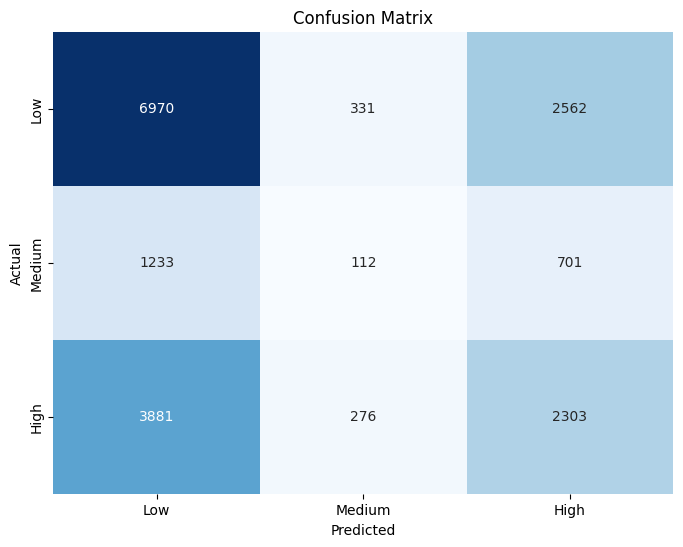

In [73]:
# Createing a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Ploting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [74]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)


/home/shubham/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
# Evaluateing the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.5773858130546029
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.87      0.71      9863
           1       0.31      0.01      0.02      2046
           2       0.50      0.32      0.39      6460

    accuracy                           0.58     18369
   macro avg       0.47      0.40      0.37     18369
weighted avg       0.53      0.58      0.52     18369



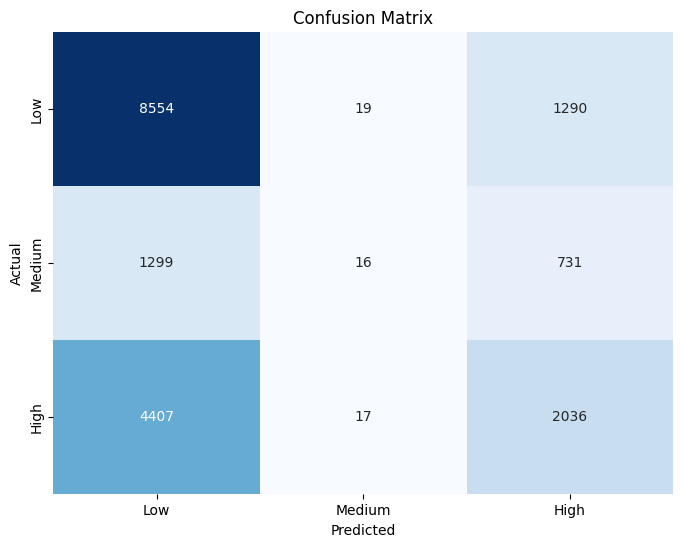

In [76]:
# Createing a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Ploting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [77]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Gaussian Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)


In [78]:
# Evaluateing the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.1214001850944526
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.02      0.03      9863
           1       0.11      0.99      0.20      2046
           2       0.41      0.01      0.02      6460

    accuracy                           0.12     18369
   macro avg       0.41      0.34      0.08     18369
weighted avg       0.53      0.12      0.05     18369



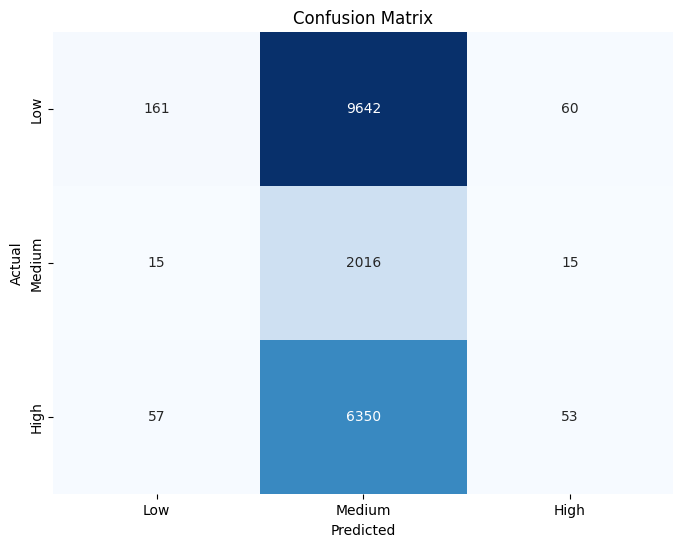

In [79]:
# Createing a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Ploting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### NOTE: In the output:
- 0: Low diabetes severity level(Lower cost of care )
- 1: Medium diabetes severity level (Lower cost of care )
- 2: High diabetes severity level(Care Intervention)


### Here we have trained 3 model i.e. Random forest, Xg_boost and LSTM for getting this task done, In the last model the accuracy droped but one important thing we was able to capture was the better scores for the pacients with high level of diabetes severity which is more important in this specific case.

In [80]:
model_names = ['Random forest', 'Xg_boost', 'KNN','Logistic Regression','Naive Bayes']
performance_metrics = {
    'Model': model_names,
    'Accuracy': [0.5814687789210082, 0.5965485328542653, 0.5079753933257118, 0.5690565626871359,0.1214001850944526],
    'Precision': [0.55, 0.56, 0.47,0.52, 0.53],
    'Recall': [0.58, 0.60, 0.51, 0.57, 0.12],
    'F1-Score': [0.53, 0.56, 0.48, 0.50, 0.05],

}

performance_df = pd.DataFrame(performance_metrics)

performance_df.set_index('Model', inplace=True)
performance_df

,Accuracy,Precision,Recall,F1-Score
Model,,,,
Random forest,0.581469,0.55,0.58,0.53
Xg_boost,0.596549,0.56,0.60,0.56
KNN,0.507975,0.47,0.51,0.48
Logistic Regression,0.569057,0.52,0.57,0.50
Naive Bayes,0.121400,0.53,0.12,0.05


In [81]:
performance_df

,Accuracy,Precision,Recall,F1-Score
Model,,,,
Random forest,0.581469,0.55,0.58,0.53
Xg_boost,0.596549,0.56,0.60,0.56
KNN,0.507975,0.47,0.51,0.48
Logistic Regression,0.569057,0.52,0.57,0.50
Naive Bayes,0.121400,0.53,0.12,0.05
